# CS4248 Project Group 23

In [10]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np
import tensorflow as tf

In [11]:
train = pd.read_csv("raw_data/fulltrain.csv")
x_train = train.iloc[:, 1].values 
y_train = train.iloc[:, 0].values == 4 # true => trusted

#val-train split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [12]:
# References

# https://www.tensorflow.org/text/tutorials/text_classification_rnn
# https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dense, Bidirectional

VOCAB_SIZE = 5000
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 200
encoder = tf.keras.layers.TextVectorization(
    output_sequence_length=MAX_SEQUENCE_LENGTH,
    max_tokens=VOCAB_SIZE)
encoder.adapt(x_train)

model = Sequential([
    encoder,
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, mask_zero=True),
    Bidirectional(LSTM(64)),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

2024-04-12 02:49:10.534970: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 334857264 exceeds 10% of free system memory.
2024-04-12 02:49:10.535051: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 502285896 exceeds 10% of free system memory.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [15]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 3, validation_data=(x_val, y_val))

Epoch 1/3


1222/1222 ━━━━━━━━━━━━━━━━━━━━ 175s 138ms/step - acc: 0.8997 - loss: 0.2637 - val_acc: 0.9584 - val_loss: 0.1069
Epoch 2/3
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 162s 133ms/step - acc: 0.9722 - loss: 0.0751 - val_acc: 0.9605 - val_loss: 0.1140
Epoch 3/3
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 162s 133ms/step - acc: 0.9834 - loss: 0.0457 - val_acc: 0.9581 - val_loss: 0.1373
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 50s 41ms/step


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


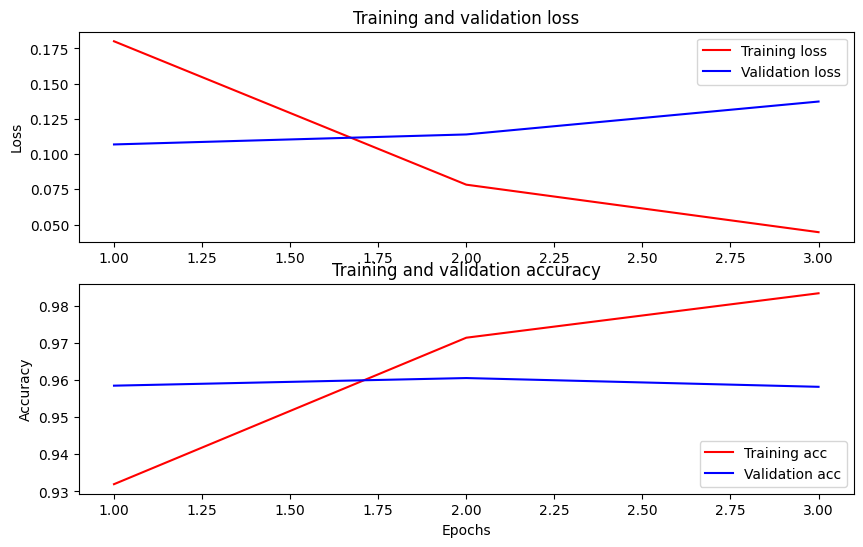

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
print(history_dict.keys())

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [20]:
# get the training error

# print for the train set f1 score is
print("Train Set: " + str(f1_score(y_train, np.round(model.predict(x_train)), average='macro')))
# print for the validation set f1 score is
print("Validation Set: " + str(f1_score(y_val, np.round(model.predict(x_val)), average='macro')))

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 49s 40ms/step
Train Set: 0.9879728000295107
306/306 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step
Validation Set: 0.9332334615595443


In [22]:
# get the prediction for the test set
test = pd.read_csv('raw_data/balancedtest.csv')

x_test = test.iloc[:, 1].values 
y_test = test.iloc[:, 0].values == 4

y_pred = np.round(model.predict(x_test))

# get the f1 score
f1_score_test = f1_score(y_test, y_pred, average='macro')
print(f1_score_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step
0.8461622014577281
